# Apply Family

In [2]:
# apply() arrays matrix
# tapply() divide vectors in subsets
# lapply() vectors and lists
# sapply() friendly version of lapply()
# vapply() like sapply() modifies the return
# rapply() like lapply()
# eapply() makes a list
# mapply() like sapply(), multvariation
# by() aggregation

In [5]:
list1 <- list(a = (1:20), b = (35:67))

In [7]:
#?sapply
sapply(list1, sum)

a    b 
 210 1683

In [8]:
sapply(list1, mean)

a    b 
10.5 51.0

In [10]:
A <- matrix(c(20, 13, 45, 73, 43, 92, 24, 87, 67), nr = 3, byrow = T)
A

20,13,45
73,43,92
24,87,67


In [13]:
apply(A, mean)

ERROR: Error in match.fun(FUN): argument "FUN" is missing, with no default


In [18]:
line = 1
apply(A, line, mean)

[1] 26.00000 69.33333 59.33333

In [16]:
column = 2
apply(A, column, mean)

[1] 39.00000 47.66667 68.00000

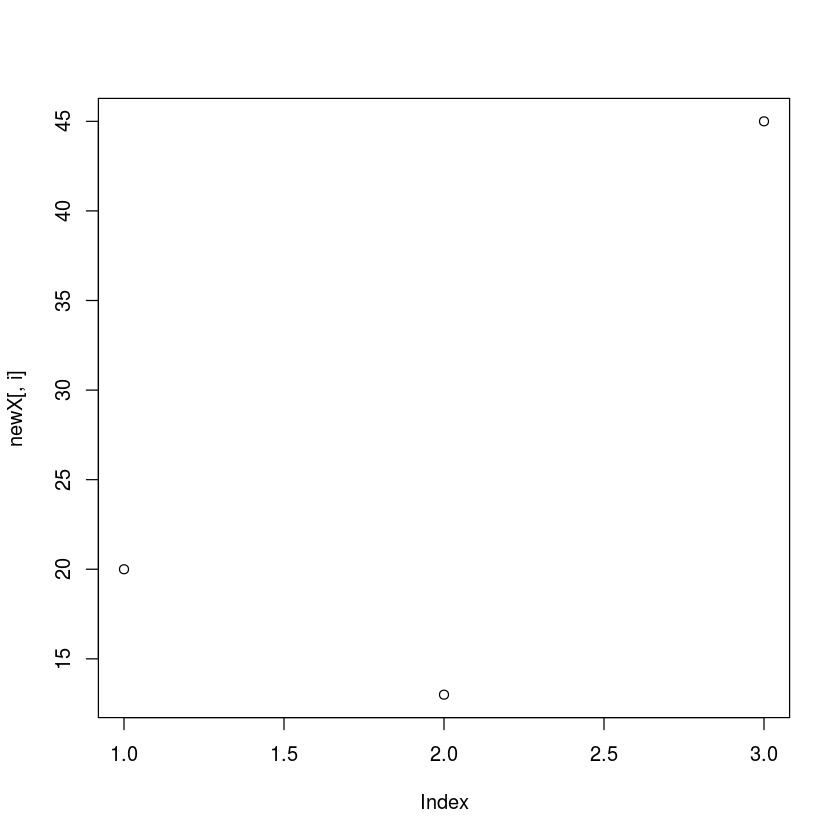

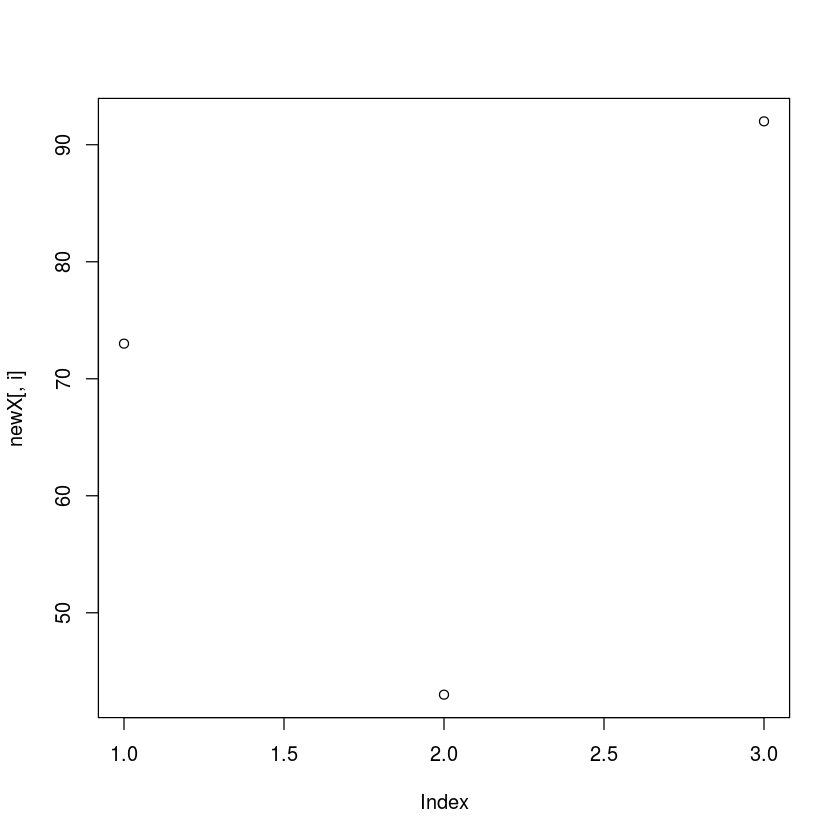

NULL

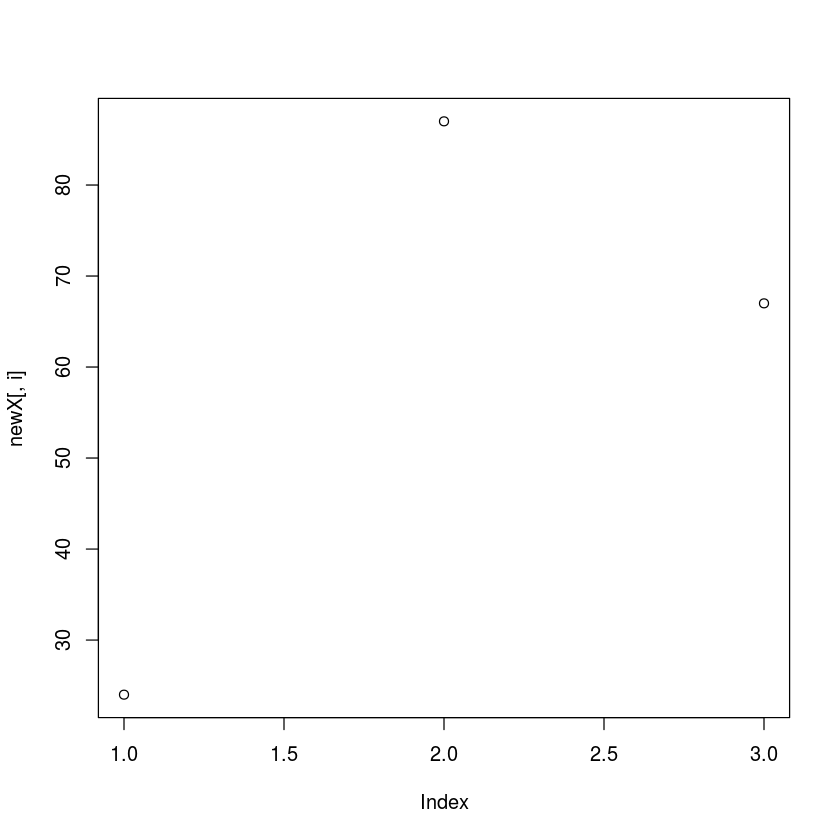

In [19]:
apply(A, line, plot)

In [20]:
result = apply(A, line, mean)
result

[1] 26.00000 69.33333 59.33333

In [21]:
school <- data.frame(Person = c('Bob', 'Alice', 'John', 'Elton', 'Mary', 'Raven'),
                    Fisics = c(91, 82, 75, 97, 62, 74),
                    Math = c(99, 100, 86, 92, 91, 87),
                    Chem = c(56, 72, 49, 68, 59, 80))
school

Person,Fisics,Math,Chem
Bob,91,99,56
Alice,82,100,72
John,75,86,49
Elton,97,92,68
Mary,62,91,59
Raven,74,87,80


In [22]:
school$Mean = NA
school

Person,Fisics,Math,Chem,Mean
Bob,91,99,56,NA
Alice,82,100,72,NA
John,75,86,49,NA
Elton,97,92,68,NA
Mary,62,91,59,NA
Raven,74,87,80,NA


In [24]:
school$Mean <- apply(school[, c(2,3,4)], 1, mean)
school

Person,Fisics,Math,Chem,Mean
Bob,91,99,56,82.00000
Alice,82,100,72,84.66667
John,75,86,49,70.00000
Elton,97,92,68,85.66667
Mary,62,91,59,70.66667
Raven,74,87,80,80.33333


In [25]:
school$Mean <- round(school$Mean)
school

Person,Fisics,Math,Chem,Mean
Bob,91,99,56,82
Alice,82,100,72,85
John,75,86,49,70
Elton,97,92,68,86
Mary,62,91,59,71
Raven,74,87,80,80


In [26]:
basket_table <- data.frame(team = gl(5, 5, labels = paste("Team", LETTERS[1:5])),
                          player = sample(letters, 25),
                          baskets = floor(runif(25, min = 0, max = 50)))
basket_table

team,player,baskets
Team A,o,38
Team A,y,44
Team A,b,39
Team A,f,37
Team A,h,46
Team B,m,31
Team B,j,11
Team B,u,34
Team B,s,26
Team B,i,10


In [27]:
summary(basket_table)

     team       player      baskets     
 Team A:5   a      : 1   Min.   : 0.00  
 Team B:5   b      : 1   1st Qu.:15.00  
 Team C:5   c      : 1   Median :30.00  
 Team D:5   d      : 1   Mean   :26.72  
 Team E:5   e      : 1   3rd Qu.:37.00  
            f      : 1   Max.   :47.00  
            (Other):19                  

In [29]:
install.packages("sqldf")
library(sqldf)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [30]:
sqldf('select team, sum(baskets) from basket_table group by team')

team,sum(baskets)
Team A,204
Team B,112
Team C,79
Team D,133
Team E,140


In [37]:
tapply(basket_table$baskets, basket_table$team, sum)

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_generic(html_escape_names(obj), "%s. %s\n", "%s\n:   %s", 
 .     "**%s:** %s", "%s\n\n", item_uses_numbers = TRUE, escape_fun = html_escape)
10. html_escape_names(obj)
11. .escape_names(obj, "html")
12. colnames(obj)
ERROR while rich displaying an object: 

Team A Team B Team C Team D Team E 
   204    112     79    133    140